<a href="https://colab.research.google.com/github/massirism/PDI-UNS/blob/main/TP1_Massiris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

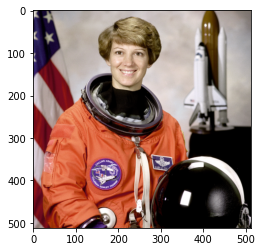

In [ ]:
# Cargar la imagen
img_rgb = imageio.imread('imageio:astronaut.png')/255

# Mostrar la imagen
plt.imshow(img_rgb)

Seleccionar el canal ROJO

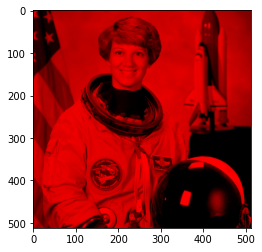

In [ ]:
M = np.array([[1, 0, 0],  #RED
              [0, 0, 0],  #GREEN
              [0, 0, 0]]) #BLUE

img_canal_rojo = apply_matrix(img_rgb, M)

plt.imshow(img_canal_rojo)

Escala de  GRISES

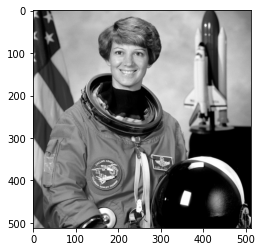

In [ ]:
M = np.array([[1/3, 1/3, 1/3],  #RED
              [1/3, 1/3, 1/3],  #GREEN
              [1/3, 1/3, 1/3]]) #BLUE

#M = np.ones((3,3))/3

img_gris = apply_matrix(img_rgb, M)

plt.imshow(img_gris)

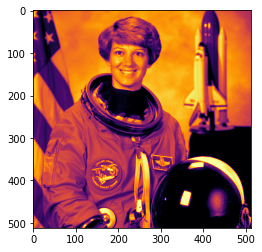

In [ ]:
"""
https://stackoverflow.com/questions/60757339/what-does-the-slice-operator-img-1-with-images-do
img[x,y,BGR] so, if BGR=0--->GRAY-GRIS
"""
img_gris_2 = img_gris[:,:,0]

plt.imshow(img_gris_2, 'inferno')

Matriz aleatoria

[[0.07594016 0.93220985 0.4200927 ]
 [0.11935784 0.33471544 0.01399502]
 [0.69281293 0.98593307 0.79081632]]


Text(0.5, 1.0, 'Imagen reconvertida a RGB')

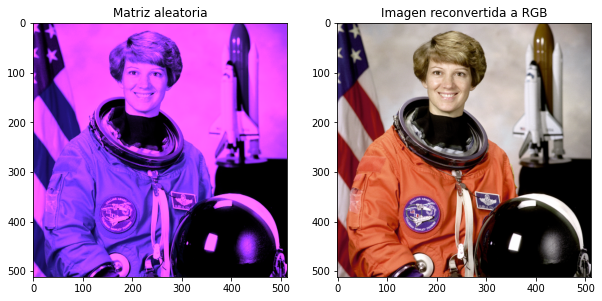

In [ ]:
#Matriz aleatoria
M = np.random.rand(3, 3)

img_random = apply_matrix(img_rgb, M)

#Matriz invertida
M_inv = np.linalg.inv(M)
img_random_inv = apply_matrix(img_random, M_inv) #Se aplica la matriz inversa a la imagen random y se recupera la imagen original

print(M)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_random, 0, 1))
axes[0].set_title('Matriz aleatoria')
axes[1].imshow(np.clip(img_random_inv, 0, 1))
axes[1].set_title('Imagen reconvertida a RGB')

1. Intercambiar los canales: R->G, G->B, B->R

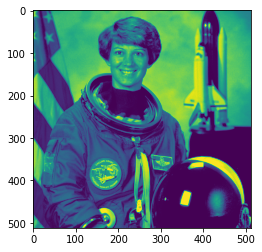

In [ ]:
img=img_rgb
#x,y,rgb
plt.imshow(img[:,:,2])

SWAP R and G

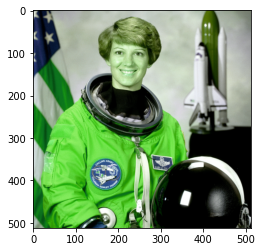

In [ ]:
#R->G, es BGR a RGB
img=img_rgb
"""
#BGR
#0-BLUE,1-GREEN,2-RED
red = img[:,:,2].copy()
green = img[:,:,1].copy()
blue = img[:,:,0].copy()
"""

#RGB
red = img[:,:,0].copy()
green = img[:,:,1].copy()
blue = img[:,:,2].copy()

img[:,:,0] = green #ROJO=VERDE
img[:,:,1] = red  #VERDE=ROJO


plt.imshow(img)

SWAP G and B

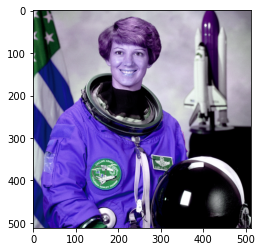

In [ ]:
img=img_rgb

#RGB
# RED=0,  GREEN=1,  BLUE=2
red = img[:,:,0].copy()
green = img[:,:,1].copy()
blue = img[:,:,2].copy()

img[:,:,1]=blue
img[:,:,2]=green

plt.imshow(img)


SWAP B and R

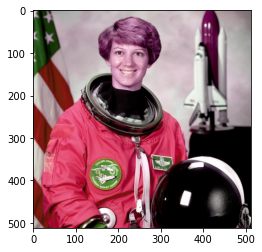

In [ ]:
img=img_rgb

#RGB
# RED=0,  GREEN=1,  BLUE=2
red = img[:,:,0].copy()
green = img[:,:,1].copy()
blue = img[:,:,2].copy()

img[:,:,2]=red
img[:,:,0]=blue

plt.imshow(img)

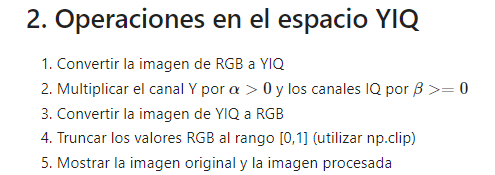

In [ ]:
# Cargar la imagen
img_rgb = imageio.imread('imageio:astronaut.png')/255

1.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


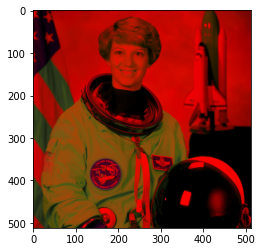

In [ ]:
#Este caso la matriz ya no es aleatoria, es la matriz YIQ
M_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                      [0.59590059, -0.27455667, -0.32134392],
                      [0.21153661, -0.52273617, 0.31119955]])

img_YIQ = apply_matrix(img_rgb, M_RGB2YIQ)

plt.imshow(img_YIQ)

2. Multiplicar el canal Y por alpha y los canales I,Q por beta

Text(0.5, 1.0, 'YIQ changed')

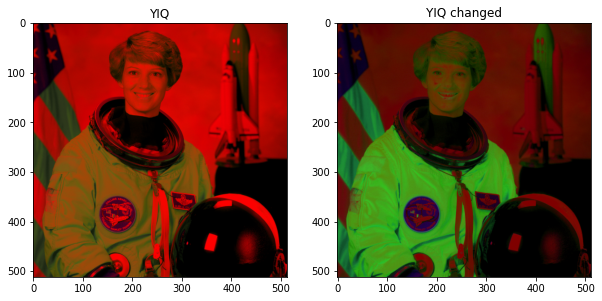

In [ ]:
#Parámetros de luminancia y saturación
alpha=0.5
beta=2

# Y=0,  I=1,  Q=2
Y = img_YIQ[:,:,0].copy()
I = img_YIQ[:,:,1].copy()
Q = img_YIQ[:,:,2].copy()

img_YIQ_CHANGED = np.zeros(img_YIQ.shape)
img_YIQ_CHANGED[:,:,0]=alpha*Y
img_YIQ_CHANGED[:,:,1]=beta*I
img_YIQ_CHANGED[:,:,2]=beta*Q

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_YIQ, 0, 1))
axes[0].set_title('YIQ')
axes[1].imshow(np.clip(img_YIQ_CHANGED, 0, 1))
axes[1].set_title('YIQ changed')

#beta: Aumenta saturación
#alpha: Disminuye luminancia

3.

Text(0.5, 1.0, 'Imagen reconvertida a RGB')

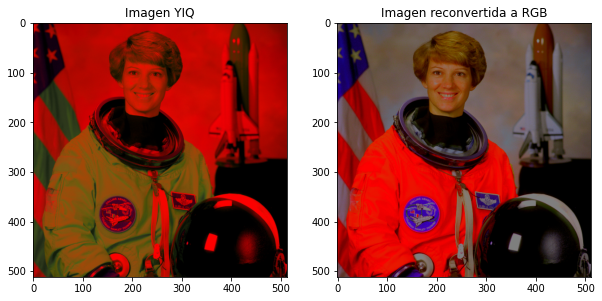

In [45]:
#Matriz invertida
M_inv = np.linalg.inv(M_RGB2YIQ)
img_RGB_BACK = apply_matrix(img_YIQ_CHANGED, M_inv) #Se aplica la matriz inversa a la imagen YIQ y se recupera la imagen original

#print(M)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_YIQ, 0, 1))
axes[0].set_title('Imagen YIQ')
axes[1].imshow(np.clip(img_RGB_BACK, 0, 1))
axes[1].set_title('Imagen reconvertida a RGB')

4.Truncar los valores RGB entre 0 y 1.

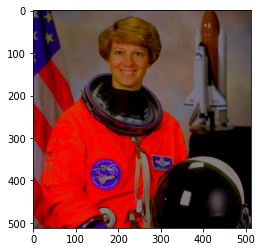

In [46]:
img_RGB_BACK=np.clip(img_RGB_BACK,0,1)

plt.imshow(img_RGB_BACK)

5. Mostrar imagen RGB original y la procesada

Text(0.5, 1.0, 'Imagen procesada RGB')

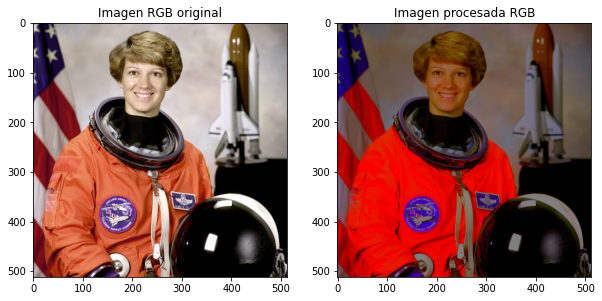

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_rgb, 0, 1))
axes[0].set_title('Imagen RGB original')
axes[1].imshow(np.clip(img_RGB_BACK, 0, 1))
axes[1].set_title('Imagen procesada RGB')

[Extra] Graficar el conjunto de Mandelbrot con distintas paletas
Aquí se utiliza la librería Seaborn para graficar, la cual utiliza Matplotlib de fondo y permite realizar gráficos más personalizados. Utiliza los mismos mapas de colores que matplotlib, los cuales se pueden elegir con la variable cmap.

Descargar el archivo "mandelbrot.npy" desde el link de abajo y guardarlo en la misma carpeta que este Notebook.

In [64]:
import seaborn as sns
# %matplotlib 
from pathlib import Path
import seaborn as sns
%matplotlib notebook

Path.cwd()

path = Path('/content/mandelbrot.npy')
x = np.load(path)


fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='inferno', square=True, xticklabels=False, yticklabels=False)

<IPython.core.display.Javascript object>